# An Evaluation of American Energy Production and Usage
By Apurva Choudhary

___


Coal is one of the largest sources of energy in the world. People have been using coal to produce energy for centuries, but it became truly essential with the dawn of the industrial revolution. Recently, we have become aware of how harmful burning coal and other fossil fuels is for our environment, so reducing our usage of these non-renewable energy sources has become very important. Unfortunately, there are millions of people who rely on it for energy, and many countries whose economies and industries rely on coal power to remain successful. We cannot just stop using coal and other fossil fuels entirely without enough preparation, otherwise, we will put all of the people whose livelihoods rely on these energy sources at risk. However, the need for reducing our carbon emissions only grows larger. 

The main question we need to answer is how we can decrease carbon emissions. This way, we have the time to reduce our dependence on coal energy and make the switch to renewable and sustainable energy. The UN has currently announced goals to reach net-zero carbon emissions by 2050. Net zero means cutting greenhouse gas emissions to as close to zero as possible, with any remaining emissions re-absorbed from the atmosphere, by oceans and forests for instance.

By observing historical data on energy production and usage in the United States, we can make predict our emissions in 2050 if we continue to progress at the same rate as before, and understand what we need to change to meet the goals we have set in terms of climate.
- For more information on the net-zero coalition, check https://www.un.org/en/climatechange/net-zero-coalition.
- For information on the different types of energy used in the United States, check https://www.eia.gov/energyexplained/electricity/electricity-in-the-us.php.

## Part 1: Data Collection
In this part, we get the data to be analyzed.

First, visit https://databank.worldbank.org/source/world-development-indicators/ to get the data. This site contains global data for health, poverty, education, infrastucture, and more. You can also use this site to understand what each data series captures. Make sure to select all years, and select these Series:
- Electricity production from coal sources (% of total)
- Electricity production from natural gas sources (% of total)
- Electricity production from oil sources (% of total)
- Electricity production from oil, gas and coal sources (% of total)
- Electricity production from renewable sources, excluding hydroelectric (kWh)
- Electricity production from hydroelectric sources (% of total)
- Electricity production from nuclear sources (% of total)
- Electricity production from renewable sources, excluding hydroelectric (% of total)
- Alternative and nuclear energy (% of total energy use)
- Combustible renewables and waste (% of total energy)
- Fossil fuel energy consumption (% of total)
- Renewable energy consumption (% of total final energy consumption)
- Renewable electricity output (% of total electricity output)
- Access to electricity (% of population)

Download the data as a csv. Here, this file is named *energy.csv*. 

___
## Part 2: Data Processing
In this part, we clean up the data and add the necessary columns for data analysis
#### Important: Only run this section once, as it changes the data!

Import all of the necessary libraries:
- pandas allows for data manipulation and analysis
- numpy adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
- matplotlib.plyplot and seaborn are python libraries used for data visualization
- the LinearRegression library from sklearn.linear_model allows us to fit linear regression models

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

Now, we need to read the data in the csv and convert it to a pandas dataframe using the *read_csv()* function. We have the imported data set displayed below.

In [160]:
data = pd.read_csv("energy.csv")
data.head()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Argentina,ARG,Electricity production from coal sources (% of...,EG.ELC.COAL.ZS,..,..,..,..,..,..,...,2.548929e+00,2.217284e+00,2.02956738894983,..,..,..,..,..,..,..
1,Argentina,ARG,Electricity production from natural gas source...,EG.ELC.NGAS.ZS,..,..,..,..,..,..,...,4.723536e+01,4.819968e+01,49.4822602564899,..,..,..,..,..,..,..
2,Argentina,ARG,Electricity production from oil sources (% of ...,EG.ELC.PETR.ZS,..,..,..,..,..,..,...,1.426825e+01,1.384011e+01,15.4231944645654,..,..,..,..,..,..,..
3,Argentina,ARG,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,..,..,..,..,..,..,...,6.405255e+01,6.425707e+01,66.935022110005,..,..,..,..,..,..,..
4,Argentina,ARG,"Electricity production from renewable sources,...",EG.ELC.RNWX.KH,..,..,..,..,..,..,...,2.942000e+09,2.719000e+09,2752000000,..,..,..,..,..,..,..


Now, we need to filter out the data to only include data from the United States.

In [161]:
data = data[data['Country Name'] == 'United States']

Now, drop unnecessary columns *Country Name*, *Country Code*, and *Series Code*.

In [162]:
data.drop(['Country Code', 'Country Name', 'Series Code'], axis = 1, inplace = True)

Now we have only years in the columns, so we transpose the data so that the variables are in the columns and the years are in the rows. The transposed data is displayed below.

In [163]:
data = data.transpose()
data.head()

,266,267,268,269,270,271,272,273,274,275,276,277,278,279
Series Name,Electricity production from coal sources (% of...,Electricity production from natural gas source...,Electricity production from oil sources (% of ...,"Electricity production from oil, gas and coal ...","Electricity production from renewable sources,...",Electricity production from hydroelectric sour...,Electricity production from nuclear sources (%...,"Electricity production from renewable sources,...",Alternative and nuclear energy (% of total ene...,Combustible renewables and waste (% of total e...,Fossil fuel energy consumption (% of total),Renewable energy consumption (% of total final...,Renewable electricity output (% of total elect...,Access to electricity (% of population)
1960 [YR1960],53.9120071928861,21.1409828193563,6.42257705904494,81.4755670712874,122000000,18.4398990094776,0.0692777977163337,0.0152561215187594,1.26126148522724,3.17480629117575,95.5256695527392,..,..,..
1961 [YR1961],53.7305350452496,21.5215393916889,6.23997295972046,81.492047396659,181000000,18.2712311420234,0.215179689322422,0.0215417719952203,1.33475774086046,3.07963937158922,95.5667993020266,..,..,..
1962 [YR1962],53.2502024255671,21.7778938006894,5.79954780561836,80.8276440318748,206000000,18.8808852744802,0.268683990460557,0.0227867031843865,1.43006193185308,2.9601446789873,95.6055139735254,..,..,..
1963 [YR1963],54.3900654256682,22.2449330356913,5.72641840522747,82.361416866587,286000000,17.2554153454428,0.353732927008749,0.0294348609614496,1.36539050879262,2.86455000154557,95.7693155916265,..,..,..


We want the first row, which contains the variable names, to be the columns, so we set *data.columns* to the first row and remove the first row from *data*.

In [164]:
data.columns = data.iloc[0]
data = data.iloc[1:]

Now, want to make the data easy to read, so we set the name of the index column to *None*, number the rows, and create a new *Year* column containing the years from 1960-2022. Notice that there is a lot of missing data in the dataframe.

In [165]:
data = data.rename_axis(None, axis=1)
data.insert(0, "Year", np.arange(1960, 2023))
data.index = np.arange(0, 63)

Now, we drop some of the columns uneccessary to our analysis, such as *Access to Energy*, and replace the missing data with np.nan - a value that signifies missing data. We then drop all of the marked missing data, since we only want to work with data we have access to, and convert all of the data we have to numeric types like *float* and *int* to make them easier to work with. Finally, we reset the index. Shown below is the cleaned data, containing all values of selected data from 1990-2015.

In [166]:
data.drop(data.columns[[5, 14]], axis = 1, inplace = True)
data = data.replace('..', np.nan)
data = data.dropna()
data = data.astype(float)
data['Year'] = data['Year'].astype(int)
data.index = np.arange(1, len(data) + 1)

We also want to better quantify renewable energy wastage energy later on, so lets add a column to our data frame titled Renewable Energy Wastage (%), which is made up of value calculated using this formula:

% wastage = (output-consumption)/output

In [167]:
data['Renewable Energy Wastage (%)'] = (data['Renewable electricity output (% of total electricity output)'] - data['Renewable energy consumption (% of total final energy consumption)'])/data['Renewable electricity output (% of total electricity output)']

Now the data has been fully processed.

In [168]:
data

,Year,Electricity production from coal sources (% of total),Electricity production from natural gas sources (% of total),Electricity production from oil sources (% of total),"Electricity production from oil, gas and coal sources (% of total)",Electricity production from hydroelectric sources (% of total),Electricity production from nuclear sources (% of total),"Electricity production from renewable sources, excluding hydroelectric (% of total)",Alternative and nuclear energy (% of total energy use),Combustible renewables and waste (% of total energy),Fossil fuel energy consumption (% of total),Renewable energy consumption (% of total final energy consumption),Renewable electricity output (% of total electricity output),Renewable Energy Wastage (%)
1,1990,53.067350,11.916681,4.079195,69.063227,8.528503,19.095370,3.000144,9.451116,1.432828,86.437838,4.175462,11.528647,0.637819
2,1991,52.601102,12.357714,3.904249,68.863064,8.854524,19.951488,1.902891,9.987584,1.524699,85.694738,4.507920,10.757414,0.580948
3,1992,53.240005,13.052907,3.256561,69.549474,7.777510,20.056583,2.138600,9.754804,1.785500,85.574822,4.763083,9.916110,0.519662
4,1993,53.401307,13.003019,3.740476,70.144802,8.353187,19.076609,2.131139,9.577853,1.410683,86.117965,4.281528,10.484326,0.591626
5,1994,52.516231,14.256090,3.491394,70.263715,7.612426,19.668408,2.134810,9.751877,1.376094,85.912129,4.088641,9.747236,0.580533
6,1995,51.499280,14.861957,2.450248,68.811485,8.827515,20.059893,1.973570,10.244067,1.582729,85.469336,4.726554,10.801085,0.562400
7,1996,52.722031,13.112380,2.649535,68.483947,9.611080,19.588173,1.970370,10.174803,1.515823,85.510061,4.763930,11.581450,0.588659
8,1997,53.809548,13.769518,2.949687,70.528754,9.072904,18.146053,1.904924,9.424684,1.433443,86.456494,4.514260,10.977828,0.588784
9,1998,52.735127,14.678628,3.866444,71.280198,7.782749,18.770489,1.825836,9.799134,1.562479,86.086594,4.534297,9.608585,0.528099
10,1999,52.116718,15.022906,3.503735,70.643359,7.174470,19.924706,1.894730,10.354744,2.189311,85.784601,5.709727,9.069201,0.370427


Now that we have this data, we can start analyzing it!

___
## Part 3 and 4: Exploratory Analysis & Data Vizualization and Model Analysis, Hypothesis Testing, & ML
These two parts are combined, since each section displays, vizualizes, and analyzes the given data, and has models fit to the relevant data.

### Section 1: Data Analysis of Energy Production 

First, lets compare the percentage production of the different energy types - coal, natural gas, oil, hydroelectric, nuclear, and other renewable sources (which includes geothermal, solar photovoltaic, solar thermal, tide, wind, industrial waste, municipal waste, primary solid biofuels, biogases, biogasoline, biodiesels, other liquid biofuels, nonspecified primary biofuels and waste, and charcoal).

In 2005, the 2005 Energy Policy Act (EPA) was passed. It addressed energy efficiency, renewable energy, oil and gas, coal, tribal energy, nuclear matters, vehicles and motor fuels (including ethanol, hydrogen, electricity), energy tax incentives, hydropower and geothermal energy, and climate change technology. It promoted the usage of alternative fuels, and changed the trajectories of various energy initiatives. I have included a dotted grey line signalling when the policy was passed. Its effect can be seen most easily on the line showing the measure of other renewable energy production. 

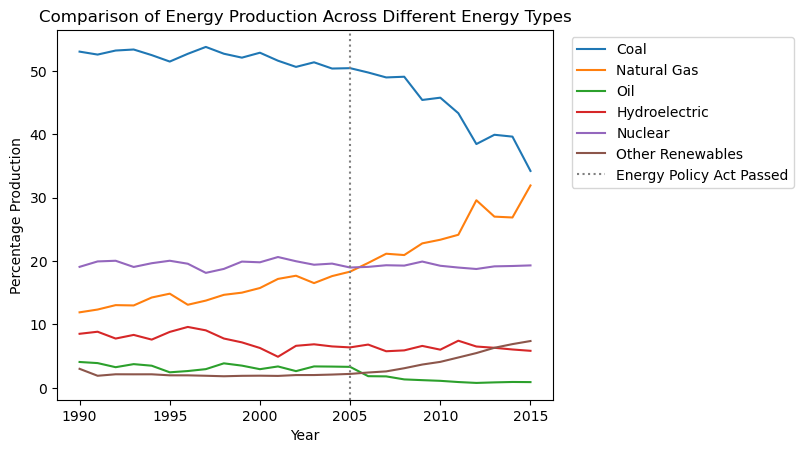

In [169]:
plt.plot(data['Year'], data[data.columns[1]]) #Coal
plt.plot(data['Year'], data[data.columns[2]]) #Natural Gas
plt.plot(data['Year'], data[data.columns[3]]) #Oil
plt.plot(data['Year'], data[data.columns[5]]) #Hydroelectric
plt.plot(data['Year'], data[data.columns[6]]) #Nuclear
plt.plot(data['Year'], data[data.columns[7]]) #Other renewables
plt.axvline(x = 2005, color = 'grey', linestyle = 'dotted')
plt.legend(['Coal', 'Natural Gas', 'Oil', 'Hydroelectric', 'Nuclear', 'Other Renewables', 'Energy Policy Act Passed'], bbox_to_anchor=(0.8, 0, .7, 1))
plt.xlabel("Year")
plt.ylabel('Percentage Production')
plt.title('Comparison of Energy Production Across Different Energy Types')
plt.show()

Here, we can see that a large reduction in coal usage occurs starting around 2005, while a  similar increase occurs in the production of natural gas. 

Natural gas is the "cleanest" burning fossil fuel, producing much less CO2 than coal does, which accounts for this reduction in production as the United States seeks to lower its CO2 emissions. However, natural gas also produces about half as much energy as burning coal. The United States has been shifting from coal to natural gas since the 1980s, when the government began deregulating the price of natural gas to encourage American to use it as an alternative to coal. Since the early 2000s, the US has been retiring, converting, or replacing coal plants in an effort to reduce emissions.

Lets look more closely at the relationship between the production of energy and time to predict  what energy consumption in other sectors may look like in 2050 if nothing has changed the trajectories of energy production since 2015. We are using data from 2005 onward, since the EPA had a major effect on energy production.

Here, we fit the data for each type of energy to a regression line. We are using the sklearn RegressionLine library to fit these models and predict the production percentages from 2015-2050.

In [170]:
from2005 = data[data['Year'] > 2004]
X = np.array(from2005['Year']).reshape(-1, 1)
X_pred = np.arange(2005, 2051).reshape(-1,1)

#Coal Regression Line
y = np.array(from2005[from2005.columns[1]]).reshape(-1, 1)
cregr = LinearRegression()
cregr.fit(X, y)
coal_pred = cregr.predict(X_pred)

#Natural Gas Regression Line
y = np.array(from2005[from2005.columns[2]]).reshape(-1, 1)
ngregr = LinearRegression()
ngregr.fit(X, y)
ng_pred = ngregr.predict(X_pred)

#Oil Regression Line
y = np.array(from2005[from2005.columns[3]]).reshape(-1, 1)
oregr = LinearRegression()
oregr.fit(X, y)
oil_pred = oregr.predict(X_pred)

#Hydroelectric Regression Line
y = np.array(from2005[from2005.columns[5]]).reshape(-1, 1)
hregr = LinearRegression()
hregr.fit(X, y)
hydro_pred = hregr.predict(X_pred)

#Nuclear Regression Line
y = np.array(from2005[from2005.columns[6]]).reshape(-1, 1)
nregr = LinearRegression()
nregr.fit(X, y)
nuc_pred = nregr.predict(X_pred)

#Other Renewables Regression Line
y = np.array(from2005[from2005.columns[7]]).reshape(-1, 1)
orregr = LinearRegression()
orregr.fit(X, y)
other_pred = orregr.predict(X_pred)

Now, we graph these predictions

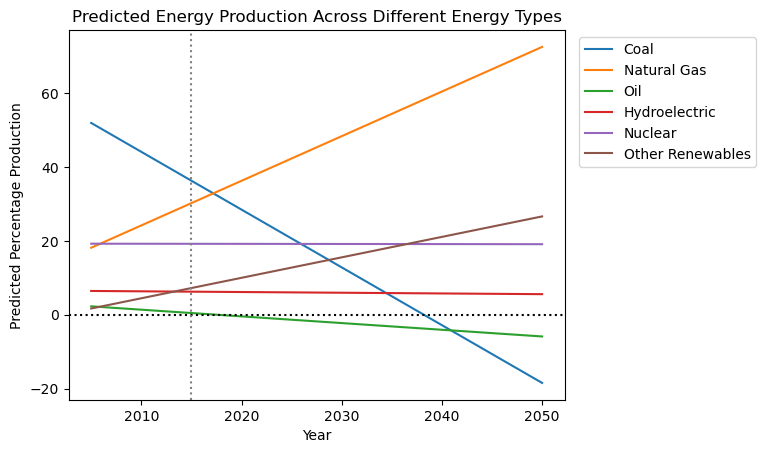

In [171]:
plt.plot(X_pred, coal_pred) #Coal
plt.plot(X_pred, ng_pred) #Natural Gas
plt.plot(X_pred, oil_pred) #Oil
plt.plot(X_pred, hydro_pred) #Hydroelectric
plt.plot(X_pred, nuc_pred) #Nuclear
plt.plot(X_pred, other_pred) #Other Renewables
plt.legend(['Coal', 'Natural Gas', 'Oil', 'Hydroelectric', 'Nuclear', 'Other Renewables'], bbox_to_anchor=(0.7, 0, .7, 1))
plt.axhline(y = 0, color = 'black', linestyle = 'dotted')
plt.axvline(x = 2015, color = 'grey', linestyle = 'dotted')
plt.xlabel("Year")
plt.ylabel('Predicted Percentage Production')
plt.title('Predicted Energy Production Across Different Energy Types')
plt.show()

Here, we see that the regression line for the given data is graphed before the dotted grey line, while the predicted data is after the dotted grey line. From these predictions, we can see that coal, oil, nuclear, and hydroelectric energy production will decrease, while natural gas and other renewable production will increase. However, these regression lines are not entirely accurate predictions of the different energy productions due to various reasons:
- The regression line for oil and coal dips below 0, which would affect the other percentages
    - While the total sum of proportions is still 100, the negative oil proportion changes the data, rendering the proportions incorrect.
- Lack of variable interactions in this model 
    - Natural gas production is more expensive than coal production for the same unit of energy, so cost would need to be taken into account in a more accurate model.
    - Lack of recent data between 2015-2023, years that contained a lot of policy changes concerning energy production and consumption.
- Nature of data
    - This is percentage data, not actual measures. As such, the measures may have increased while percentages decreased due to the differences in proportions of energy production, rendering this model incorrect on predicted proportions.

While many of these are issues we cannot account for in a Linear Regression model with the data we have, we can account for the oil dipping below 0 by replacing the coal, natural gas, and oil regression lines with a single line for the combined data. Below is the graph showing the combined data for reference.

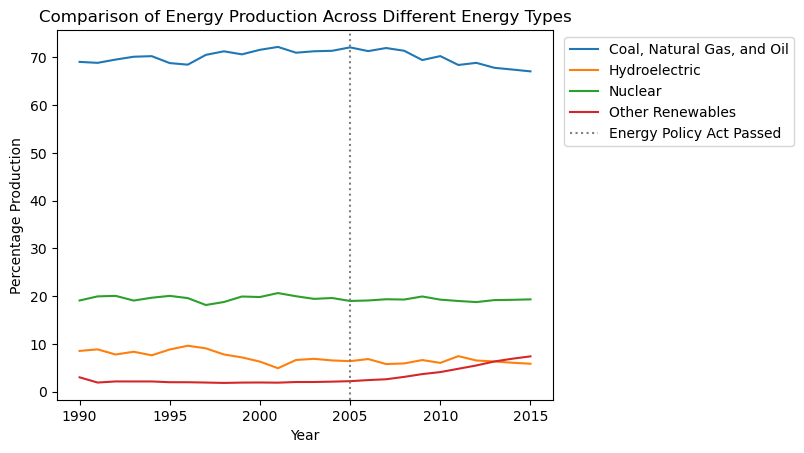

In [172]:
plt.plot(data['Year'], data[data.columns[4]]) #Coal, Natural Gas, Oil
plt.plot(data['Year'], data[data.columns[5]]) #Hydroelectric
plt.plot(data['Year'], data[data.columns[6]]) #Nuclear
plt.plot(data['Year'], data[data.columns[7]]) #Other renewables
plt.axvline(x = 2005, color = 'grey', linestyle = 'dotted')
plt.legend(['Coal, Natural Gas, and Oil', 'Hydroelectric', 'Nuclear', 'Other Renewables', 'Energy Policy Act Passed'], bbox_to_anchor=(0.8, 0, .7, 1))
plt.xlabel("Year")
plt.ylabel('Percentage Production')
plt.title('Comparison of Energy Production Across Different Energy Types')
plt.show()

Now, we fit a regression line for non-renewable fossil fuels and plot this new regression line with the rest of the regression lines.

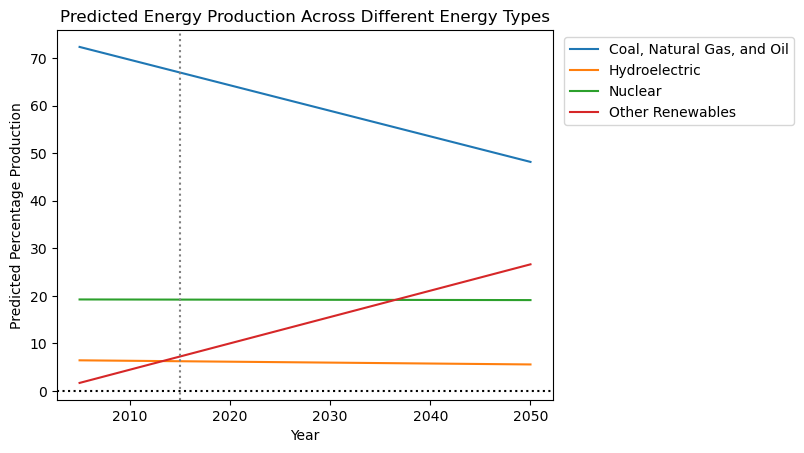

In [173]:
#Combined Coal, Natural Gas, and Oil Regression Line
y = np.array(from2005[from2005.columns[4]]).reshape(-1, 1)
combregr = LinearRegression()
combregr.fit(X, y)
comb_pred = combregr.predict(X_pred)

plt.plot(X_pred, comb_pred) #Combined Fossil Fuels
plt.plot(X_pred, hydro_pred) #Hydroelectric
plt.plot(X_pred, nuc_pred) #Nuclear
plt.plot(X_pred, other_pred) #Other Renewables
plt.legend(['Coal, Natural Gas, and Oil', 'Hydroelectric', 'Nuclear', 'Other Renewables'], bbox_to_anchor=(0.8, 0, .7, 1))
plt.axhline(y = 0, color = 'black', linestyle = 'dotted')
plt.axvline(x = 2015, color = 'grey', linestyle = 'dotted')
plt.xlabel("Year")
plt.ylabel('Predicted Percentage Production')
plt.title('Predicted Energy Production Across Different Energy Types')
plt.show()

From this regression line, we can get a better picture of how much fossil fuels we are producing, and how that percentage may change without the data being affected by negative percentages. We can see that overall fossil fuel production will decrease by almost 1/3 of the inital predicted percentage in 2005, but not at the significant amount we need to reach the UN's goal of carbon neutrality 2040. The graph also shows that nuclear and hydroelectric energy production proportions decrease very incrementally, while other renewable energy production increases drastically to match the decrease in coal, natural gas, and oil.


Now, lets determine the fit of these models with the *sklearn LinearRegression score()* method, which returns the coefficient of determination of the prediction.
The coefficient of determination is defined as 1-u/v, where u is the residual sum of squares *((y_true - y_pred)** 2).sum()* and v is the total sum of squares *((y_true - y_true.mean()) ** 2).sum()*. 

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a score of 0.0.

In [174]:
print('Determination of Prediction:')
print('Combined Coal, Natural Gas, Oil:   ' + str(combregr.score(X, np.array(from2005[from2005.columns[4]]).reshape(-1, 1))))
print('Hydroelectric:                     ' + str(hregr.score(X, np.array(from2005[from2005.columns[5]]).reshape(-1, 1))))
print('Nuclear:                           ' + str(nregr.score(X, np.array(from2005[from2005.columns[6]]).reshape(-1, 1))))
print('Other Renewables:                  ' + str(orregr.score(X, np.array(from2005[from2005.columns[7]]).reshape(-1, 1))))

Determination of Prediction:
Combined Coal, Natural Gas, Oil:   0.9194223275900175
Hydroelectric:                     0.016455495440956924
Nuclear:                           0.001088251788134098
Other Renewables:                  0.9782890910666736


From these scores, we can determine that the model predicting the non-renewable fossil fuels and the model predicting other renewable energy production are very good, while the hydroelectric and nuclear scores are not as good. This can likely be attributed to the fact that the data is fit with only 10 data points (2005-2015). If given more data after 2005, we can better fit this data.

Once again, there are many factors we can't account for in a regression model like this one, but this is an easy way to visualize general trends in energy production data. For a better understanding of the actual situation, it would be better to get the actual measures of data and use those to predict future data production and proportions.

### Section 2: Data Analysis of Cleaner Energy Usage

Let's now compare the usage of cleaner energies. For reference: 
- Alternative and Nuclear energy sources Alternative produce energy without the same consequences of burning fossil fuels, such as high carbon dioxide emissions, which is considered to be the major contributing factor of global warming.
- Combustible renewables and waste energy is produced with solid biomass and animal products, gas and liquid from biomass, and industrial and municipal waste.
- Renewable energy is energy that is derived from natural processes (e.g. sunlight and wind) that are replenished at a higher rate than they are consumed. 

Note: In this case, the data for renewable energy contains the conbustible renewables and waste.
To combat this, we will graph non-combustible renewables (which include solar, wind, and hydropower) as the percenatge difference *total renewable - combustible renewable*

We will now plot the different cleaner energy types and compare them. We will keep the grey dotted line, indicating that the 2005 Energy Policy Act has passed. We will also plot the fossil fuels as *fossil fuels - combustible renewables and waste*, since they are included in the data for this category.

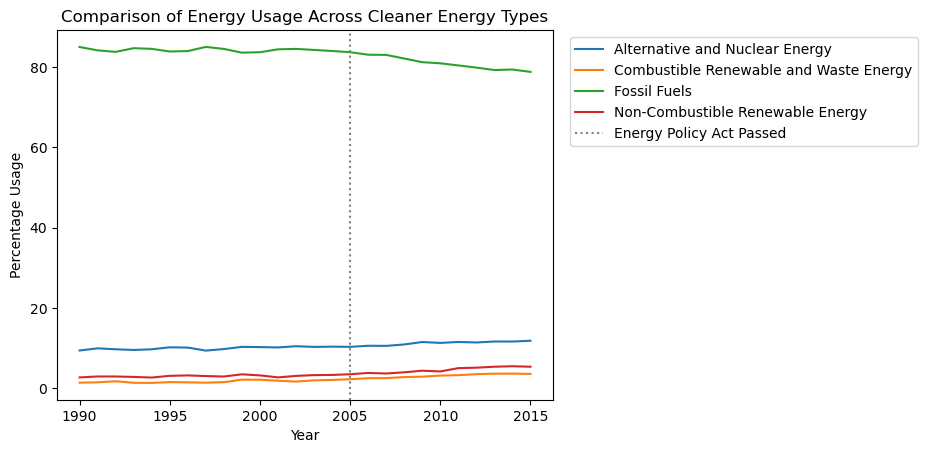

In [175]:
plt.plot(data['Year'], data[data.columns[8]]) #Alternative and Nuclear
plt.plot(data['Year'], data[data.columns[9]]) #Combustible Renewable and Waste
plt.plot(data['Year'], data[data.columns[10]] - data[data.columns[9]]) #Fossil Fuels
plt.plot(data['Year'], data[data.columns[11]] - data[data.columns[9]]) #Non-Combustible Renewable
plt.axvline(x = 2005, color = 'grey', linestyle = 'dotted')
plt.legend(['Alternative and Nuclear Energy', 'Combustible Renewable and Waste Energy', 'Fossil Fuels', 'Non-Combustible Renewable Energy', 'Energy Policy Act Passed'], bbox_to_anchor=(1.05, 0, .7, 1))
plt.xlabel("Year")
plt.ylabel('Percentage Usage')
plt.title('Comparison of Energy Usage Across Cleaner Energy Types')
plt.show()

From the above data, we can conclude that we are increasing our usage of carbon neutral energies (alternative, nuclear, non-combustible renewable energy) and combustible renewable energies, which release far fewer emissions than coal or natural gas and are completely biodegradeable. We are also steadily decreasing our use of fossil fuels.

Now, we want to predict the energy usage of both clean and fossil fuels in the future. We will fit a regression line model to understand this. We will use data from 2005, since that is when the Energy Policy Act was passed.

In [176]:
from2005 = data[data['Year'] > 2004]
X = np.array(from2005['Year']).reshape(-1, 1)
X_pred = np.arange(2005, 2051).reshape(-1,1)

#Alternative and Nuclear Regression Line
y = np.array(from2005[from2005.columns[8]]).reshape(-1, 1)
altregr = LinearRegression()
altregr.fit(X, y)
alt_pred = altregr.predict(X_pred)

#Combustible Renewables and Waste
y = np.array(from2005[from2005.columns[9]]).reshape(-1, 1)
crregr = LinearRegression()
crregr.fit(X, y)
cr_pred = crregr.predict(X_pred)

#Fossil Fuels
y = np.array(from2005[from2005.columns[10]] - from2005[from2005.columns[9]]).reshape(-1, 1)
ffregr = LinearRegression()
ffregr.fit(X, y)
ff_pred = ffregr.predict(X_pred)

#Non-Combustible Renewables
y = np.array(from2005[from2005.columns[11]] - from2005[from2005.columns[9]]).reshape(-1, 1)
nrregr = LinearRegression()
nrregr.fit(X, y)
nr_pred = nrregr.predict(X_pred)

Now, we will plot the regression lines. As with previous regression plots, all values after the grey dashed line are predicted values.

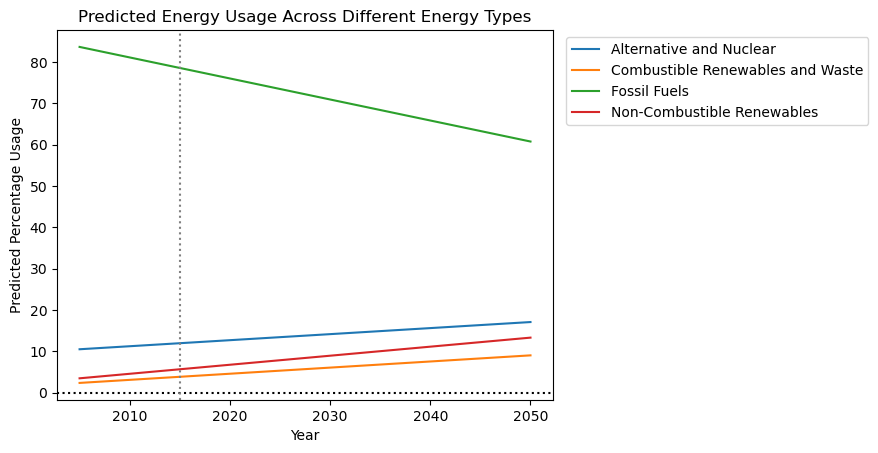

In [177]:
plt.plot(X_pred, alt_pred) #Alternative and Nuclear Regression Line
plt.plot(X_pred, cr_pred) #Combustible Renewables and Waste
plt.plot(X_pred, ff_pred) #Fossil Fuels
plt.plot(X_pred, nr_pred) #Non-Combustible Renewables
plt.legend(['Alternative and Nuclear', 'Combustible Renewables and Waste', 'Fossil Fuels', 'Non-Combustible Renewables'], bbox_to_anchor=(.95, 0, .7, 1))
plt.axhline(y = 0, color = 'black', linestyle = 'dotted')
plt.axvline(x = 2015, color = 'grey', linestyle = 'dotted')
plt.xlabel("Year")
plt.ylabel('Predicted Percentage Usage')
plt.title('Predicted Energy Usage Across Different Energy Types')
plt.show()

From this plot, we can conlude that fossil fuel usage decreases and alternative, nuclear, and renewable energy usage will increase before 2050. Though carbon emissions will likely either slow or remain the same, we will still not even be close to the goal of carbon neutrality by 2040, especially if our energy concumption continues to increase as it has been in the past few decades.

Now, we will once again determine the fit of these models with the sklearn LinearRegression score() method, which returns the coefficient of determination of the prediction. The coefficient of determination is defined as 1-u/v, where u is the residual sum of squares ((y_true - y_pred)* 2).sum()* and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a score of 0.0.

In [178]:
print('Determination of Prediction:')
print('Alternative and Nuclear:           ' + str(altregr.score(X, np.array(from2005[from2005.columns[8]]).reshape(-1, 1))))
print('Combustible Renewable and Waste:   ' + str(crregr.score(X, np.array(from2005[from2005.columns[9]]).reshape(-1, 1))))
print('Fossil Fuels:                      ' + str(ffregr.score(X, np.array(from2005[from2005.columns[10]] - from2005[from2005.columns[9]]).reshape(-1, 1))))
print('Non-Combustible Renewables:        ' + str(nrregr.score(X, np.array(from2005[from2005.columns[11]] - from2005[from2005.columns[9]]).reshape(-1, 1))))

Determination of Prediction:
Alternative and Nuclear:           0.8660899317569069
Combustible Renewable and Waste:   0.9543911136531452
Fossil Fuels:                      0.9763559724828423
Non-Combustible Renewables:        0.9292152037749452


From these scores, we can determine that all of the models are very good for predicting this data. However, it is possible that the model is overfit, since the data is fit with only 10 data points (2005-2015). If given more data after 2005, we can better fit this data for the future.

### Section 3: Data Analysis of Renewable Energy Wastage

Since most renewable energy cannot be easily transported or stored (with the exception of biofuels), it must be used close to where it is produced, and has an expiratio date much like perishable foods. Lets find out how much of the renewable energy we produce is actually used.

First, we plot the renewable electricity output, which is the proportion of renewable energy produced in the US, against the renewable energy consumption, which is the proportion of renewable energy usage out of total energy consumption, not energy consumption from domestically produced energy. This difference may affect the calculations for energy wastage, since the proportions may be slightly off.

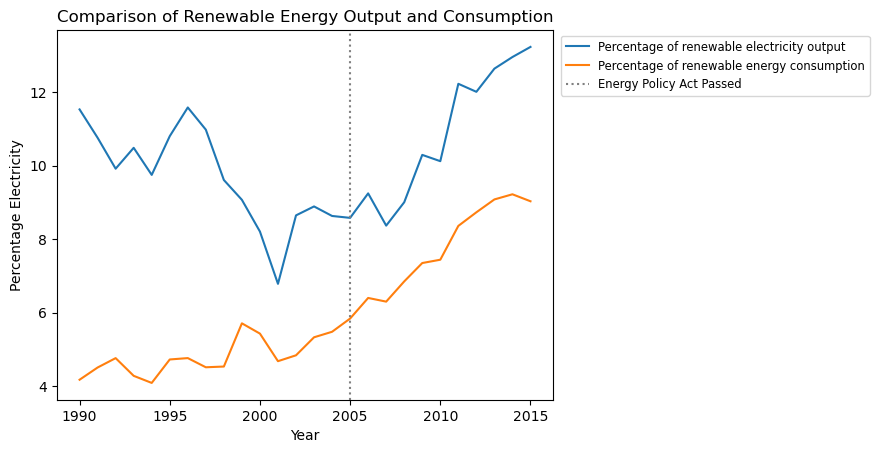

In [179]:
plt.plot(data['Year'], data['Renewable electricity output (% of total electricity output)'])
plt.plot(data['Year'], data['Renewable energy consumption (% of total final energy consumption)'])
plt.axvline(x = 2005, color = 'grey', linestyle = 'dotted')
plt.legend(['Percentage of renewable electricity output', 'Percentage of renewable energy consumption', 'Energy Policy Act Passed'], fontsize = "small", bbox_to_anchor=(.95, 0, .7, 1))
plt.xlabel('Year')
plt.ylabel('Percentage Electricity')
plt.title('Comparison of Renewable Energy Output and Consumption')
plt.show()

Now, when we plot this data, we can see the percent energy wastage across years in a standardized way. The regression line for this data ha also been plotted.

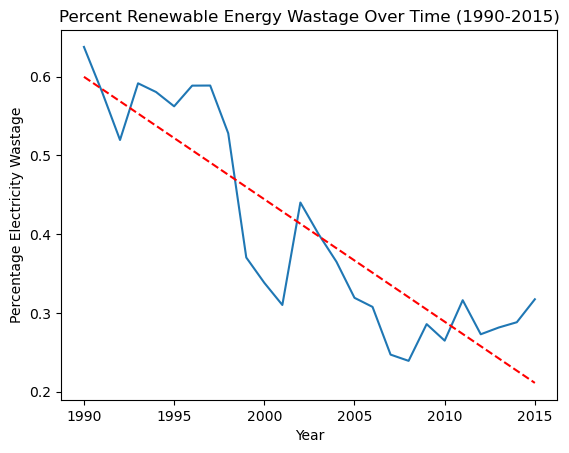

In [180]:
plt.plot(data['Year'], data['Renewable Energy Wastage (%)'])
a, b = np.polyfit(data['Year'], data['Renewable Energy Wastage (%)'], 1)
plt.plot(data['Year'], a*data['Year']+b, color="red", linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Percentage Electricity Wastage')
plt.title('Percent Renewable Energy Wastage Over Time (1990-2015)')
plt.show()

From this graph, we can conclude that the energy wastage from renewable sources of energy is decreasing over time since the regression line has a negative slope. This is likely due to technological advancements in energy storage and transportation, as well as a more effective use of the renewable energy produced.

___
## Part 5: Interpretation: Insight & Policy Decision

This is the part of the lifecycle where we attempt to utilize our data analysis to draw conclusions and potentially infer certain portions of our data.

To review Part 3 & 4:
- In Section 1, we compared the percentage production of the different energy types - coal, natural gas, oil, hydroelectric, nuclear, and other renewable sources by creating a regression model for each type of energy and graphing them together. 
    - We concluded that that overall fossil fuel production will decrease, but not at the significant rate we need to reach the UN's goal of carbon neutrality 2040. The graph also shows that nuclear and hydroelectric energy production proportions decrease very incrementally, while other renewable energy production increases drastically to match the decrease in coal, natural gas, and oil.
- In Section 2, we compared the usage of the dirrerent energy types - alternative & nuclear, combustible renewables, fossil fuels (minus combustible renewables), and non-combustible renewables.
    - We concluded that fossil fuel usage decreases and alternative, nuclear, and renewable energy usage will increase before 2050. Though carbon emissions will likely either slow or remain the same, we will still not even be close to the goal of carbon neutrality by 2040, especially if our energy concumption continues to increase as it has been in the past few decades.    
- In Section 3, we calculated the percentage of wasted renewable energy
    - We concluded that energy wastage from renewable sources of energy is decreasing over time, most likley due t technological advancements in energy storage and transportation and the more effective management of renewable energy
    
    
From this information, we can see that if our fossil fuel energy production and consumption continues at the rate it has been since we passed the Energy Policy Act in 2005, we will be unable to meet the UN's goal of net-zero carbon by 2040 since we will be producing far more CO2 than can be sequestered.
This can be slightly mitigated by continuing to work to reduce energy wastage, especially renewable energy wastage, and developing more efficient and cleaner technologies to sequester carbon.

However, we can conclude that it is more important than ever to reduce our carbon emissions by encouraging large corporations to switch to renewable energy, and lobbying the government for more clean and renewable energy production plants and reduced switching costs so that more people can make the switch from fossil fuels to clean energy.

If we could conduct further research, we would have wanted to include data from 2015 and onwards, since many important enironmental policy initiatives like the Paris Agreement of 2015 were passed during that time, new energy technologies have been patented, and events like the Russian invasion of Ukraine required policy to be passed on the import of fossil fuels. We would have also liked to include some data on American attitudes towards energy production and consumption in the United States over time and energy policies passed in the past few decades to understand the impact of general public opinion on our energy production and consumption.

If you want to learn more about initiatives to combat climate change, check these out:
- https://www.un.org/en/climatechange/climate-action-coalitions
- https://www.whitehouse.gov/climate/
- https://climate.nasa.gov/

We hope that you learned something from this tutorial and had fun!